<IPython.core.display.Javascript object>


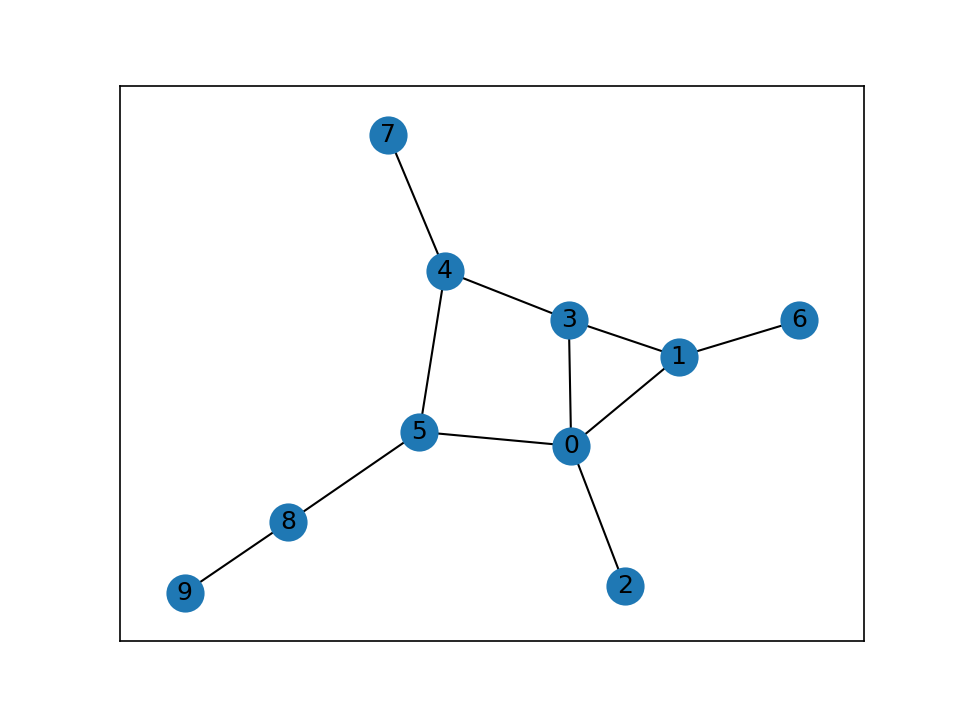

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G1
nx.draw_networkx(G1)

In [2]:
!cat G_adjlist.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

In [ ]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

In [ ]:
G3 = nx.Graph(G_mat)
G3.edges()

In [ ]:
!cat G_edgelist.txt

In [ ]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

In [ ]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

In [ ]:
G5 = nx.from_pandas_dataframe(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

In [ ]:
!head -5 chess_graph.txt

In [ ]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [ ]:
chess.is_directed(), chess.is_multigraph()

In [ ]:
chess.edges(data=True)

In [ ]:
games_played = chess.degree()
games_played

In [ ]:
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

In [ ]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

In [ ]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

In [ ]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

In [ ]:
win_count.nlargest(5, 'outcome')